# Machine Learning Foundation

## Course 5, Part d: Keras Intro LAB


## Using Keras to Build and Train Neural Networks


In this exercise we will use a neural network to predict diabetes using the Pima Diabetes Dataset.  We will start by training a Random Forest to get a performance baseline.  Then we will use the Keras package to quickly build and train a neural network and compare the performance.  We will see how different network structures affect the performance, training time, and level of overfitting (or underfitting).

## UCI Pima Diabetes Dataset

* UCI ML Repositiory (http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)


### Attributes: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)


The UCI Pima Diabetes Dataset which has 8 numerical predictors and a binary outcome.


In [4]:
#Setup
import warnings
import skillsnetwork

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [5]:
## Import Keras objects for Deep Learning
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

In [6]:
## Load in the data set 
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module2/L2/diabetes.csv", overwrite=True)

names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv('./diabetes.csv', names=names, header=0)

Saved to '.'


In [7]:
print(diabetes_df.shape)

(768, 9)


In [8]:
diabetes_df.sample(5)

,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
622,6,183,94,0,0,40.8,1.461,45,0
14,5,166,72,19,175,25.8,0.587,51,1
358,12,88,74,40,54,35.3,0.378,48,0
388,5,144,82,26,285,32.0,0.452,58,1
185,7,194,68,28,0,35.9,0.745,41,1


In [14]:
X = diabetes_df.iloc[:,:-1].values
y = diabetes_df["has_diabetes"].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=11111)

In [16]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Above, we see that about 35% of the patients in this dataset have diabetes, while 65% do not.  This means we can get an accuracy of 65% without any model - just declare that no one has diabetes. We will calculate the ROC-AUC score to evaluate performance of our model, and also look at the accuracy as well to see if we improved upon the 65% accuracy.
## Exercise 1: Get a baseline performance using Random Forest
To begin, and get a baseline for classifier performance:
1. Train a Random Forest model with 200 trees on the training data.
2. Calculate the accuracy and roc_auc_score of the predictions.


In [17]:
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [18]:
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)

In [20]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))


accuracy is 0.771
roc-auc is 0.825


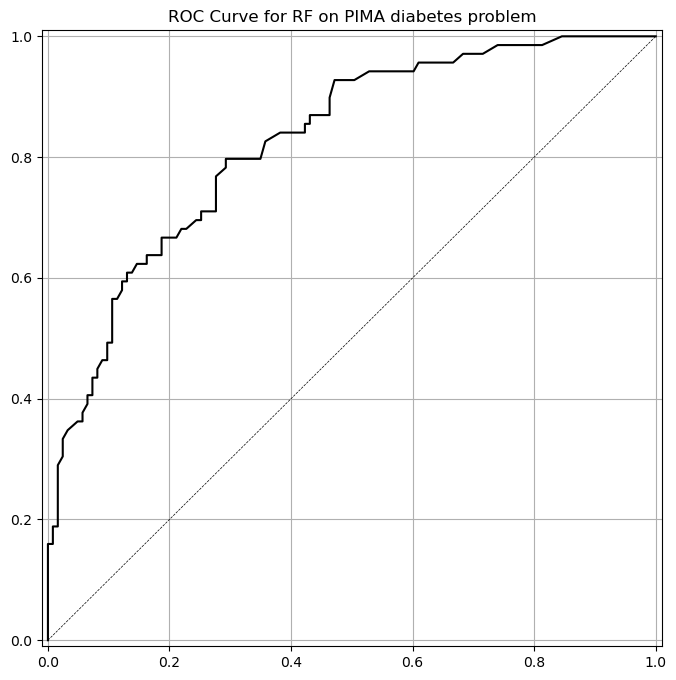

In [21]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
    plt.show()
plot_roc(y_test, y_pred_prob_rf[:, 1], 'RF')
### END SOLUTION

## Build a Single Hidden Layer Neural Network

We will use the Sequential model to quickly build a neural network.  Our first network will be a single layer network.  We have 8 variables, so we set the input shape to 8.  Let's start by having a single hidden layer with 12 nodes.


In [22]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

- Modelo `secuencial (Sequential)` en `Keras`, que es una forma de construir redes neuronales capa por capa en un orden lineal, ideal para modelos simples como una red densa.
- 12: Define el número de neuronas en esta capa oculta, es decir, tendrá 12 unidades.
- `input_shape=(8,)`: Especifica la forma de la entrada para la red. Aquí, cada ejemplo de entrada tendrá 8 características o dimensiones (esto es necesario en la primera capa).
- `activation='sigmoid'`: Usa la función de activación sigmoide en cada neurona. Esta función convierte las salidas en valores entre 0 y 1, útil en muchos casos para escalonar la salida de las neuronas.

Este modelo tiene una estructura: _8 entradas -> 12 neuronas en la capa oculta -> 1 neurona en la capa de salida_.

In [23]:
model_1 = Sequential()
model_1.add(Dense(12, 
                  input_shape=(8,),
                  activation='sigmoid'))

model_1.add(Dense(1,activation='sigmoid'))

2024-10-28 13:26:38.481493: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [24]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


### Comprehension question:
Why do we have 121 parameters?  Does that make sense?

Let's fit our model for 200 epochs.


- Optimizador `(SGD(lr=.003))`:

    - Se utiliza el **Gradiente Descendente Estocástico (SGD)** para ajustar los pesos del modelo durante el entrenamiento.
    - `lr=0.003` define la **tasa de aprendizaje** (learning rate), que controla la magnitud de cada ajuste a los pesos. Un valor más alto acelera el aprendizaje, pero puede llevar a una solución subóptima, mientras que un valor más bajo da lugar a un ajuste más preciso pero más lento.

- Función de pérdida `("binary_crossentropy"):`

    - "binary_crossentropy" es una función de pérdida común para tareas de clasificación binaria. Calcula la diferencia entre las predicciones del modelo (valores entre 0 y 1, gracias a la activación sigmoid) y las etiquetas verdaderas.
    - El objetivo es minimizar esta pérdida, mejorando la precisión del modelo en clasificar correctamente los datos en una de las dos clases.

- Métricas `(metrics=["accuracy"]):`
    - `"accuracy"` es la métrica que se registrará en cada época de entrenamiento. Representa el porcentaje de predicciones correctas en el conjunto de entrenamiento y el de validación.


- `epochs=200:` Indica el número de veces que el modelo recorrerá todo el conjunto de entrenamiento. Aquí, el modelo entrenará durante 200 épocas.


In [26]:
model_1.compile(SGD(lr=.003), "binary_crossentropy", metrics=["accuracy"])

run_hist_1 = model_1.fit(X_train_norm,
                          y_train,
                          validation_data=(X_test_norm,y_test),
                          epochs=200)

Epoch 1/200
18/18 [==============================] - 1s 25ms/step - loss: 0.6361 - accuracy: 0.6806 - val_loss: 0.6407 - val_accuracy: 0.6562
Epoch 2/200
18/18 [==============================] - 0s 9ms/step - loss: 0.6338 - accuracy: 0.6719 - val_loss: 0.6385 - val_accuracy: 0.6458
Epoch 3/200
18/18 [==============================] - 0s 8ms/step - loss: 0.6316 - accuracy: 0.6684 - val_loss: 0.6364 - val_accuracy: 0.6406
Epoch 4/200
18/18 [==============================] - 0s 9ms/step - loss: 0.6296 - accuracy: 0.6753 - val_loss: 0.6346 - val_accuracy: 0.6510
Epoch 5/200
18/18 [==============================] - 0s 14ms/step - loss: 0.6277 - accuracy: 0.6771 - val_loss: 0.6328 - val_accuracy: 0.6562
Epoch 6/200
18/18 [==============================] - 0s 14ms/step - loss: 0.6260 - accuracy: 0.6719 - val_loss: 0.6312 - val_accuracy: 0.6458
Epoch 7/200
18/18 [==============================] - 0s 15ms/step - loss: 0.6243 - accuracy: 0.6719 - val_loss: 0.6296 - val_accuracy: 0.6562
Epoch 8/2

In [27]:
y_pred_prob_nn_1 = model_1.predict(X_test_norm)
y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype(int)

6/6 [==============================] - 0s 3ms/step


accuracy is 0.729
roc-auc is 0.809


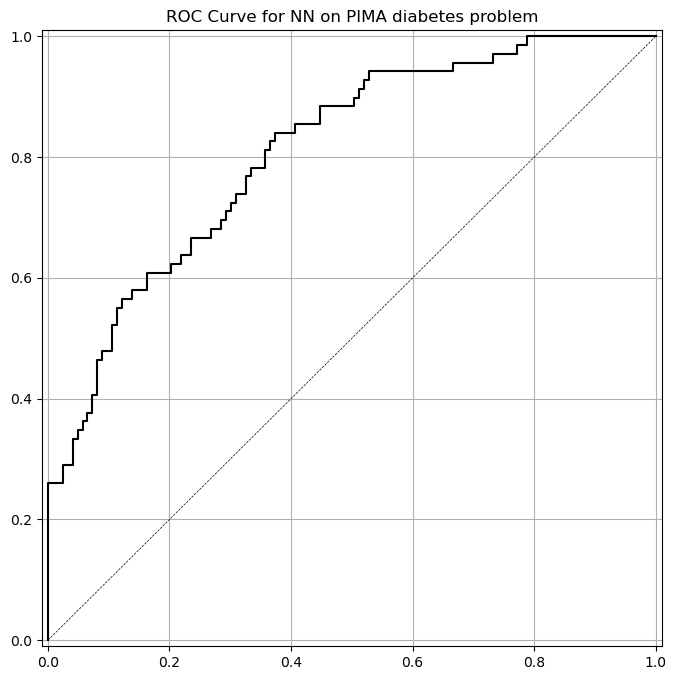

In [28]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

There may be some variation in exact numbers due to randomness, but you should get results in the same ballpark as the Random Forest - between 75% and 85% accuracy, between .8 and .9 for AUC.


Let's look at the `run_hist_1` object that was created, specifically its `history` attribute.


In [29]:
run_hist_1.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Let's plot the training loss and the validation loss over the different epochs and see how it looks.


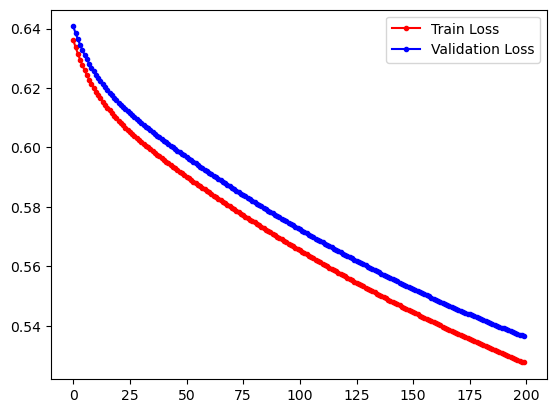

In [30]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
plt.show()

Looks like the losses are still going down on both the training set and the validation set.  This suggests that the model might benefit from further training.  Let's train the model a little more and see what happens. Note that it will pick up from where it left off. Train for 1000 more epochs.


In [31]:
run_hist_1b = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)


Epoch 1/1000
18/18 [==============================] - 0s 18ms/step - loss: 0.5274 - accuracy: 0.7292 - val_loss: 0.5362 - val_accuracy: 0.7292
Epoch 2/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.5271 - accuracy: 0.7292 - val_loss: 0.5359 - val_accuracy: 0.7292
Epoch 3/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.5268 - accuracy: 0.7309 - val_loss: 0.5356 - val_accuracy: 0.7292
Epoch 4/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.5264 - accuracy: 0.7309 - val_loss: 0.5353 - val_accuracy: 0.7344
Epoch 5/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.5262 - accuracy: 0.7309 - val_loss: 0.5351 - val_accuracy: 0.7344
Epoch 6/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.5259 - accuracy: 0.7309 - val_loss: 0.5348 - val_accuracy: 0.7344
Epoch 7/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.5255 - accuracy: 0.7326 - val_loss: 0.5345 - val_accuracy: 0.7344
E

Note that this graph begins where the other left off.  While the training loss is still going down, it looks like the validation loss has stabilized (or even gotten worse!).  This suggests that our network will not benefit from further training.  What is the appropriate number of epochs?


## Exercise 2
For this exercise, do the following in the cells below:
- Build a model with two hidden layers, each with 6 nodes
- Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
- Use a learning rate of .003 and train for 1500 epochs
- Graph the trajectory of the loss functions, accuracy on both train and test set
- Plot the roc curve for the predictions

Experiment with different learning rates, numbers of epochs, and network structures


In [32]:
### BEGIN SOLUTION
model_2 = Sequential()
model_2.add(Dense(6, input_shape=(8,), activation="relu"))
model_2.add(Dense(6,  activation="relu"))
model_2.add(Dense(1, activation="sigmoid"))

model_2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 1s 23ms/step - loss: 0.7418 - accuracy: 0.5330 - val_loss: 0.7625 - val_accuracy: 0.5469
Epoch 2/1500
18/18 [==============================] - 0s 8ms/step - loss: 0.7378 - accuracy: 0.5417 - val_loss: 0.7585 - val_accuracy: 0.5521
Epoch 3/1500
18/18 [==============================] - 0s 9ms/step - loss: 0.7341 - accuracy: 0.5486 - val_loss: 0.7546 - val_accuracy: 0.5729
Epoch 4/1500
18/18 [==============================] - 0s 7ms/step - loss: 0.7304 - accuracy: 0.5556 - val_loss: 0.7508 - val_accuracy: 0.5781
Epoch 5/1500
18/18 [==============================] - 0s 9ms/step - loss: 0.7269 - accuracy: 0.5677 - val_loss: 0.7471 - val_accuracy: 0.5781
Epoch 6/1500
18/18 [==============================] - 0s 11ms/step - loss: 0.7235 - accuracy: 0.5729 - val_loss: 0.7436 - val_accuracy: 0.5781
Epoch 7/1500
18/18 [==============================] - 0s 13ms/step - loss: 0.7203 - accuracy: 0.5764 - val_loss: 0.7401 - val_accuracy: 0.5729
Epo

In [35]:
run_hist_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

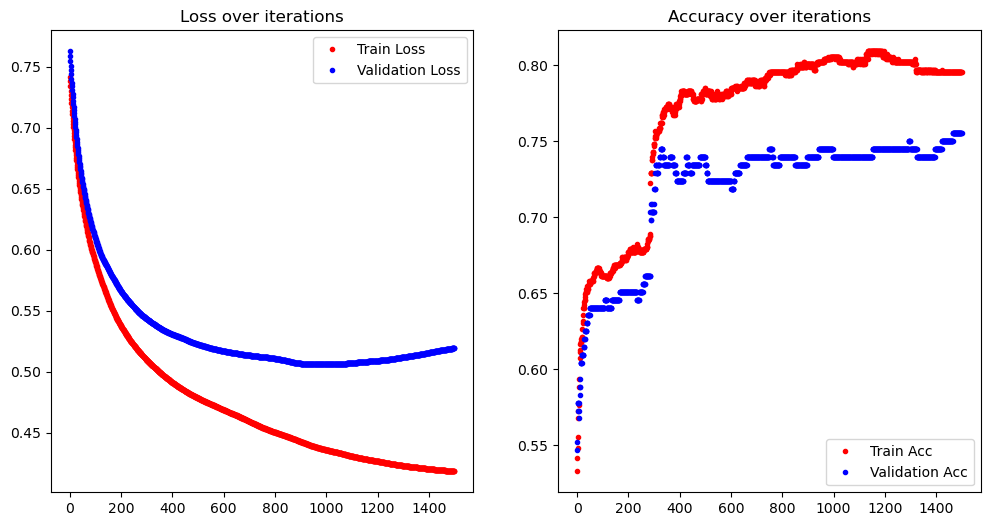

In [37]:
n = len(run_hist_2.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_2.history["loss"]),'r.', label="Train Loss")
ax.plot(range(n), (run_hist_2.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_2.history["accuracy"]),'r.', label="Train Acc")
ax.plot(range(n), (run_hist_2.history["val_accuracy"]),'b.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')
plt.show()

6/6 [==============================] - 0s 4ms/step
Accuracy is 0.755
ROC-AUC is 0.812


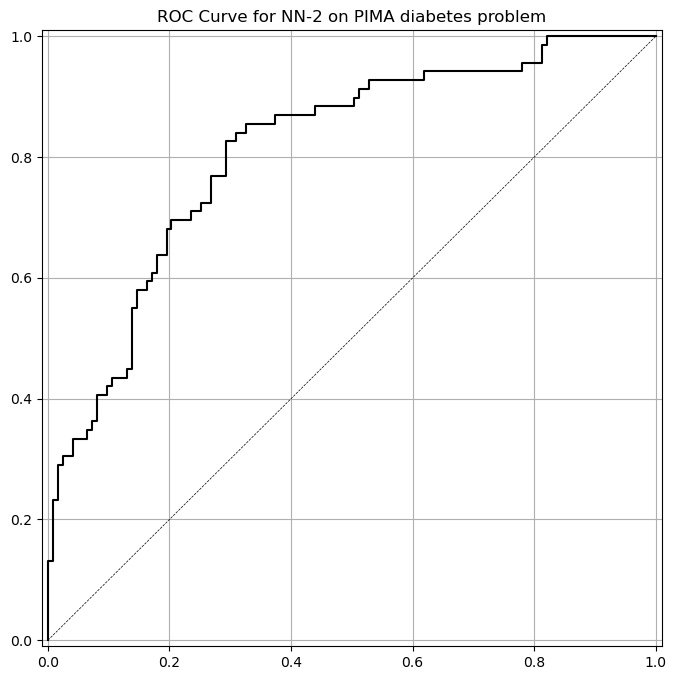

In [39]:
# y_pred_class_nn_2 = model_2.predict_classes(X_test_norm)
# y_pred_prob_nn_2 = model_2.predict(X_test_norm)
# print('')
# print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
# print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

# plot_roc(y_test, y_pred_prob_nn_2, 'NN-2')
# ### END SOLUTION


# Obtener las probabilidades de predicción
y_pred_prob_nn_2 = model_2.predict(X_test_norm)

# Convertir las probabilidades en clases (0 o 1) usando un umbral de 0.5
y_pred_class_nn_2 = (y_pred_prob_nn_2 > 0.5).astype("int32")

# Calcular precisión y AUC-ROC
print('Accuracy is {:.3f}'.format(accuracy_score(y_test, y_pred_class_nn_2)))
print('ROC-AUC is {:.3f}'.format(roc_auc_score(y_test, y_pred_prob_nn_2)))

# Graficar la curva ROC
plot_roc(y_test, y_pred_prob_nn_2, 'NN-2')

---
### Machine Learning Foundation (C) 2020 IBM Corporation
